In [203]:
import pandas as pd
import numpy  as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
import spacy
from nltk.corpus import wordnet
from cleantext import clean
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import contractions
import unicodedata
import warnings
warnings.filterwarnings('ignore')

In [204]:
df = pd.read_csv("ibis_budget_reviews.csv") #Download Siew Ping's dataset from Github to use

In [205]:
df

,Hotel_Name,Date,Title,Review,Rating
0,ibis budget Singapore Pearl,April 2022,When they say budget they mean budget,When they say budget they really mean budget. ...,2
1,ibis budget Singapore Pearl,January 2021,Poor customer service,This hotel does not live up to expectation of ...,3
2,ibis budget Singapore Pearl,February 2020,It's okay,We stayed 4 nights. We got free room promotion...,3
3,ibis budget Singapore Pearl,February 2020,Average stay,Located in an area that looks a little more ru...,3
4,ibis budget Singapore Pearl,January 2020,Good budget Hotel,Ibis pearl is good budget hotel in geylang are...,3
...,...,...,...,...,...
5324,ibis budget Singapore Selegie,December 2016,"Accesible, but tiny rooms😓",This hotel was located near Orchard road and m...,3
5325,ibis budget Singapore Selegie,September 2017,F1 weekend,Hotel is close to really good restaurants and ...,4
5326,ibis budget Singapore Selegie,November 2017,Amazing hotel in the heart of Singapore,"Beside the supper comfort, facilities and acco...",4
5327,ibis budget Singapore Selegie,October 2017,Worth it <3,Great place to stay! ^_^ Walking distance to m...,5


In [206]:
stop_words = set(stopwords.words('english'))

# Remove word 'not' in stopwords as Not can depict emotions
stop_words.remove('not')
for word in ['via', 'etc','very']:
    stop_words.add(word)

In [207]:
#create func to take pos
def pos_tag_wordnet(tagged_tokens):
    tag_map = {'j': wordnet.ADJ, 'v': wordnet.VERB, 'n': wordnet.NOUN, 'r': wordnet.ADV}
    new_tagged_tokens = [(word, tag_map.get(tag[0].lower(), wordnet.NOUN))
                            for word, tag in tagged_tokens]
    return new_tagged_tokens

### Text Pre-processing 
    - To lower case
    - Remove noise - punctuations, emoticons, accented words
    - Exapnd contractions 
    - Tokenisation
    - Stopword Removal ( remove 'Not' from stopword bag)
    - Stemming /lemmatization

In [208]:
def text_processing(review):
    
    #tokenize
    text = nltk.word_tokenize(review)
    
    #conver to lowercase 
    text = [t.lower() for t in text]
    
    # remove symbol
    text = [re.sub(r'^\d\w\s','',t) for t in text]
    
    #remove brackets
    text = [t.replace("(","").replace(")","") for t in text]
     
    # remove punctuation
    text = [t for t in text if t.isalnum()]
    
    # remove stopwords
    text  = [t for t in text if t not in  stop_words]
    
    #remove contractions
    text = [contractions.fix(t) for t in text]
    
    #Remove numbers
    text = [re.sub('\w*\d\w*', '', t) for t in text]
    
    #Remove ascii char
    text = [unicodedata.normalize('NFKD', t).encode('ascii', 'ignore').decode('utf-8', 'ignore') for t in text]
     
    #Remove empty tokens
    text = [t for t in text if t]
        
    #POS tagging
    text = nltk.pos_tag(text)
    text = pos_tag_wordnet(text)
    
    # Lemmatization
    lemma = WordNetLemmatizer()
    text = [lemma.lemmatize(t,tag) for t,tag in text]
    
    #Join tokens
    text = ' '.join(text)
    
    return text
    

In [210]:
df['p_rev'] = df.Review.apply(text_processing)
df

,Hotel_Name,Date,Title,Review,Rating,p_rev
0,ibis budget Singapore Pearl,April 2022,When they say budget they mean budget,When they say budget they really mean budget. ...,2,say budget really mean budget stay double room...
1,ibis budget Singapore Pearl,January 2021,Poor customer service,This hotel does not live up to expectation of ...,3,hotel not live expectation service standard ac...
2,ibis budget Singapore Pearl,February 2020,It's okay,We stayed 4 nights. We got free room promotion...,3,stayed night get free room promotion double ro...
3,ibis budget Singapore Pearl,February 2020,Average stay,Located in an area that looks a little more ru...,3,locate area look little run rest singapore fel...
4,ibis budget Singapore Pearl,January 2020,Good budget Hotel,Ibis pearl is good budget hotel in geylang are...,3,ibis pearl good budget hotel geylang area room...
...,...,...,...,...,...,...
5324,ibis budget Singapore Selegie,December 2016,"Accesible, but tiny rooms😓",This hotel was located near Orchard road and m...,3,hotel locate near orchard road midway little i...
5325,ibis budget Singapore Selegie,September 2017,F1 weekend,Hotel is close to really good restaurants and ...,4,hotel close really good restaurant local shop ...
5326,ibis budget Singapore Selegie,November 2017,Amazing hotel in the heart of Singapore,"Beside the supper comfort, facilities and acco...",4,beside supper comfort facility accomodations h...
5327,ibis budget Singapore Selegie,October 2017,Worth it <3,Great place to stay! ^_^ Walking distance to m...,5,great place stay walk distance mustafa one rid...


In [211]:
df['polarity'] = df['p_rev'].apply(lambda review: TextBlob(review).sentiment.polarity)

In [212]:
df

,Hotel_Name,Date,Title,Review,Rating,p_rev,polarity
0,ibis budget Singapore Pearl,April 2022,When they say budget they mean budget,When they say budget they really mean budget. ...,2,say budget really mean budget stay double room...,0.023264
1,ibis budget Singapore Pearl,January 2021,Poor customer service,This hotel does not live up to expectation of ...,3,hotel not live expectation service standard ac...,-0.069697
2,ibis budget Singapore Pearl,February 2020,It's okay,We stayed 4 nights. We got free room promotion...,3,stayed night get free room promotion double ro...,0.131111
3,ibis budget Singapore Pearl,February 2020,Average stay,Located in an area that looks a little more ru...,3,locate area look little run rest singapore fel...,0.221528
4,ibis budget Singapore Pearl,January 2020,Good budget Hotel,Ibis pearl is good budget hotel in geylang are...,3,ibis pearl good budget hotel geylang area room...,0.400000
...,...,...,...,...,...,...,...
5324,ibis budget Singapore Selegie,December 2016,"Accesible, but tiny rooms😓",This hotel was located near Orchard road and m...,3,hotel locate near orchard road midway little i...,-0.047917
5325,ibis budget Singapore Selegie,September 2017,F1 weekend,Hotel is close to really good restaurants and ...,4,hotel close really good restaurant local shop ...,0.336111
5326,ibis budget Singapore Selegie,November 2017,Amazing hotel in the heart of Singapore,"Beside the supper comfort, facilities and acco...",4,beside supper comfort facility accomodations h...,0.409722
5327,ibis budget Singapore Selegie,October 2017,Worth it <3,Great place to stay! ^_^ Walking distance to m...,5,great place stay walk distance mustafa one rid...,0.277083


In [213]:
# df['Subjectivity'] = df['Review'].apply(lambda review: TextBlob(review).sentiment.subjectivity)
# df

In [214]:
def grp_rating(row):
    if row["Rating"] <= 2:
        return "Negative"
    elif row["Rating"] == 3:
        return "Neutral"
    else:
        return "Positive"


In [215]:
df['Rating_adj'] = df.apply(grp_rating, axis=1)

In [216]:
def pol_rating(row):
    if row["polarity"] <= -0.05:
        return "Negative"
    elif row["polarity"] >= 0.15:
        return "Positive"
    else:
        return "Neutral"

df['Pol_adj'] = df.apply(pol_rating, axis=1)


In [217]:
df.sample(20)

,Hotel_Name,Date,Title,Review,Rating,p_rev,polarity,Rating_adj,Pol_adj
3585,Ibis Budget Singapore Crystal,March 2012,"You could do worse, but this is one for the bu...","Situated in the red-light district of Geylang,...",3,situate district geylang treat sight prostitut...,0.136147,Neutral,Neutral
935,ibis budget Singapore Imperial,Oct-16,There is Nothing in the name of Breakfast,"I have been here on 13th Oct 16 , hotelier was...",1,oct hotelier rude arrived hotel fully empty st...,-0.466667,Negative,Negative
4140,ibis budget Singapore Ruby,January 2016,good & compact,The rooms are all the same size as my wife and...,4,room size wife tell desk help upgrade executiv...,0.038095,Positive,Neutral
4160,ibis budget Singapore Ruby,November 2015,Perfect for the price,This hotel is conveniently located in the midd...,4,hotel conveniently locate middle geylang area ...,0.068333,Positive,Neutral
612,ibis budget Singapore West Coast,November 2019,Budget hotel near NUH,Needed to find a hotel around the NUS and NUH ...,3,need find hotel around nus nuh area take care ...,0.375000,Neutral,Positive
2271,Ibis Budget Singapore Clarke Quay,February 2019,"well located, bathroom too small and shower ve...","Plus: Very well centrally located, very friedl...",3,plus well centrally locate friedly staff great...,0.400000,Neutral,Positive
2764,Ibis Budget Singapore Clarke Quay,November 2014,Very convenient..,The hotel very nice and clear and convenient c...,5,hotel nice clear convenient close mrt clark qu...,0.457051,Positive,Positive
1276,ibis budget Singapore Joo Chiat,Dec-19,"Worth the money, great location!",I haven't done much review for Singapore but I...,5,do much review singapore enjoyed stay much nee...,0.366667,Positive,Positive
3189,Ibis Budget Singapore Clarke Quay,April 2012,Very conveniently located,Very conveniently located!! Just across the ro...,4,conveniently locate across road central mall c...,0.007576,Positive,Neutral
2832,Ibis Budget Singapore Clarke Quay,July 2013,So small!,we only stayed at singapore for 3 days to visi...,3,stay singapore day visit friend see city turn ...,0.350000,Neutral,Positive


### Some basic EDA of the sentiments and common words
- comparison between spread of category for the polarity values compared with the actual ratings
    - to check how accurate polarity reflects the actual sentiments
    - see if the category spread for polarity can be used for further treatment/analysis
\n
- check some of the top common words in the positive and negative review to get a sense of some possible areas that shows their strengths/weaknesses
    - perhaps can look further into these areas

In [218]:
df2 = df[['Pol_adj', 'Rating_adj']]

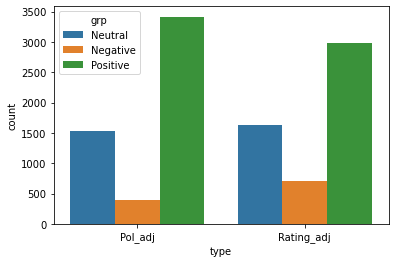

In [219]:
df2 = df2.melt(var_name='type', value_name='grp')
sns.countplot(hue='grp', x='type', data=df2)
plt.show()

In [220]:
# create individual df for processed reviews that are positive and negative respectively
# This for finding the count of the most common words
dt_pos = df['p_rev'][df['Rating_adj']=='Positive']
dt_neg = df['p_rev'][df['Rating_adj']=='Negative']

In [221]:
#Find the top 20 common words in positive review
fdistp = nltk.FreqDist(" ".join(dt_pos).split()).most_common(20)
pos_c_words = pd.DataFrame(fdistp,columns = ['words', 'count'])

#Picking out more relevant words for visualisation
for_p_chart = pos_c_words.iloc[[1,4,6,10,11,13,16,19],:].reset_index(drop=True) 

In [222]:
#Find the top 20 common words in negative review
fdistn = nltk.FreqDist(" ".join(dt_neg).split()).most_common(20)
neg_c_words = pd.DataFrame(fdistn,columns = ['words', 'count'])

#Picking out more relevant words for visualisation
for_n_chart = neg_c_words.iloc[[3,5,6,10,16,17,19],:].reset_index(drop=True)

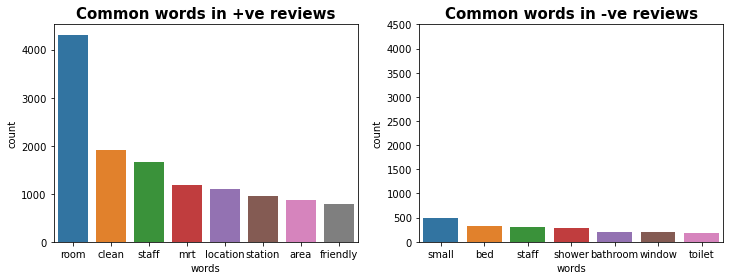

In [223]:
#plot bar chart for comparison
fig, axes = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x = for_p_chart['words'], y=for_p_chart['count'],ax = axes[0]).set_title('Common words in +ve reviews', fontsize = 15, weight = 'bold')
sns.barplot(x = for_n_chart['words'], y=for_n_chart['count'],ax = axes[1]).set_title('Common words in -ve reviews', fontsize = 15, weight = 'bold')
plt.ylim(0,4500)
plt.show()

### Observations
- The keywords in positive reviews seems to point to location, staff, cleanliness and room
- The keywords in negative reviews seems to point to size, staff, bed and toilet/showers

### Insights
- It could be that the guest of Ibis budget finds location to be an important aspect and that Ibis fulfilled this
- It also seems that majority of the guest are very happy with the staff and may find them friendly. So in terms of service they have a plus but they maybe some areas of service they one to look into
- Size of the room/toilet maybe an issue with the guests
- There could also be other negative issues with the toilets in Ibis Budget hotels as synonymous words to toilet appeared a few time in the top 20 negative common words

### Other considerations
- may want to add the words in title for nlp and analysis

In [ ]:
# df.to_csv('ibis_budget_review_sentiment.csv', encoding='utf8')